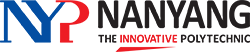

# Practical 7b: Topic Modelling


## Objectives

- Construct topic modelling models and evaluate using appropriate performance metrics.


## Topic Modelling
With the vast amount of unstructured text data, it is essential to find a method to organise the data in to meaningful groups or topics for actionable insights. Topic modelling is a technique to extract the hidden topics from the unstructured text. One of the popular topic modelling algorithm is Latent Dirichlet Allocation (LDA). With many implementations available in the internet, the challenge is not about implementing a topic model but how to extract good quality of topics. This depends on the quality of text preprocessing and the strategy of finding the optimal number of topics.,

In this practical, we will be looking at how we can use Python gensim and nltk packages to implement a LDA topic model. 

Before you can use the various packages in Python, we need to make sure the relevant packages are installed and imported. 

> pip install gensim



## Import libraries and download the packages

```Python
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import gensim
from gensim import corpora

import string
from pathlib import Path
from pprint import pprint

```
*NOTE: Ignore the warning*

In [2]:
pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/24.0 MB ? eta -:--:--
   ------ --------------------------------- 3.9/24.0 MB 12.4 MB/s eta 0:00:02
   ----------- ---------------------------- 6.8/24.0 MB 13.1 MB/s eta 0:00:02
   --------------- ------------------------ 9.4/24.0 MB 13.1 MB/s eta 0:00:02
   -------------------- ------------------- 12.6/24.0 MB 13.1 MB/s eta 0:00:01
   ----------------------------- ---------- 17.6/24.0 MB 15.0 MB/s eta 0:00:01
   ---------------------------------- ----- 21.0/24.0 MB 15.2 MB/s eta 0:00:01
   ---------------------------------------- 24.0/24.0 MB 15.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   --- ------------------------------------ 4.2/42.2 MB 20.9 MB/s eta 0:00:02
   ------- -------------------------------- 8.1/42.2 MB 20.1 MB/s eta 0:00:02
   ------------ --------------------------- 13.1/42.2 MB 21.1 MB/s eta 0:00:02
   --

In [1]:
# Enter code here
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import gensim
from gensim import corpora

import string
from pathlib import Path
from pprint import pprint

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wongw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wongw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ModuleNotFoundError: No module named 'gensim'

## Read in source files from directory

We need to extract the source files in to a data structure so that Python can process the data. The source files that we are using in this practical is extracted from sample BBC news with a total of 250 files from various categories. 

Make sure you have downloaded the data needed for the assignment. If not, please download the zipped file (**news.zip**) from Blackboard and unzip the contents. Ensure the news folder is in the same directory as your jupyter notebook.

```Python
#r is the raw string literals so that windows path slash won't create problem 
data_folder = Path(r'news')

#read each file from the directory into an array and name it corpus
corpus = []
filenames = []

for filename in data_folder.iterdir():
   fp = open(str(filename), 'r', encoding='latin1')
   corpus.append(fp.read())
   #keep the filename for later use
   filenames.append(filename.name)
   fp.close()

print(corpus.__len__())
```

In [ ]:
# Enter code here
#r is the raw string literals so that windows path slash won't create problem 
data_folder = Path(r'news')

#read each file from the directory into an array and name it corpus
corpus = []
filenames = []

for filename in data_folder.iterdir():
   fp = open(str(filename), 'r', encoding='latin1')
   corpus.append(fp.read())
   #keep the filename for later use
   filenames.append(filename.name)
   fp.close()

print(corpus.__len__())

You should see ‘250’ being printed. It indicates content of 250 files has been stored in corpus.


## Preprocessing
As covered in previous lectures, there are many preprocessing steps. We will try three in this section. They are stop words removal; punctuation removal and lemmatization using WordNet.

Setup the resources for the preprocessing steps
```Python
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
```

In [ ]:
# Enter codes here
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

Next, we will proceed to clean up the content and keep it in the doc_clean variable.
```Python
def clean(doc):
    punc_free = ''.join([ch for ch in doc.lower() if ch not in exclude])
    stop_free = ' '.join([i for i in punc_free.split() if i not in stop]) 
    normalized = ' '.join(lemma.lemmatize(word) for word in stop_free.split())
    #stemmed = ' '.join(stemmer.stem(word) for word in normalized.split())
    return normalized

doc_clean = [clean(doc).split() for doc in corpus]
```

In [ ]:
# Enter codes here
def clean(doc):
    punc_free = ''.join([ch for ch in doc.lower() if ch not in exclude])
    stop_free = ' '.join([i for i in punc_free.split() if i not in stop]) 
    normalized = ' '.join(lemma.lemmatize(word) for word in stop_free.split())
    #stemmed = ' '.join(stemmer.stem(word) for word in normalized.split())
    return normalized

doc_clean = [clean(doc).split() for doc in corpus]

In [ ]:
doc_clean

## Prepare word representation
Term frequency word representation is used in this practical and gensim package has implementation for it, which requires only 2 lines of codes.

```Python
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
```
The first line is making use Dictionary function of gensim corpora package to create a data structure keeping all the unique words. 

The second line is using the dictionary to create a doc to term matrix for each of the doc (or file) using bag of words approach.

In [ ]:
# Enter codes here
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

## Create LDA Model
We are ready to create our first LDA model. As mentioned in the lecture, there is a need to specify the number of topics in LDA. The following code uses a variable topic_num to set a value 5 for the first model: 

```Python
topic_num = 5
word_num = 5

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics = topic_num, id2word = dictionary, passes=20)

pprint(ldamodel.print_topics(num_topics=topic_num, num_words=word_num))
```


In [ ]:
# Enter code here
topic_num = 5
word_num = 5

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics = topic_num, id2word = dictionary, passes=20)

pprint(ldamodel.print_topics(num_topics=topic_num, num_words=word_num))

You may notice that the results or the topics are not very meaningful, or it is hard to identify a category. 

The interpretation of the result is based on the topic id and its list of top keyword. For example, (0,
  '0.011*"said" + 0.006*"game" + 0.005*"would" + 0.005*"one" + 0.004*"people"') means the top 5 keywords that contribute to Topic id 0 are ‘said’, ‘game’, ‘would’, ‘one’ and ‘people’ and the weight of ‘game’ is 0.006. The weights reflect how important a keyword is to that topic.

*Note: For unsupervised learning, each time you run the step above, it will give you a different result. You can set the random_state parameter to fix the reproducibility. 

A lot of parameters can be tuned to optimize training. Find out more here: https://radimrehurek.com/gensim/models/ldamodel.html *


## Topic Number

As seen above, a topic number is needed to create the LDA topic model. However, how do we determine a suitable number to use? 

One option is to use the perplexity value. It is a statistical measure of how well a probability model predicts a sample. The value on its own is quite meaningless. Its benefit comes in when comparing different LDA model and model with the lower perplexity value is generally considered “better”.

Add the following code:

```Python
# Compute Perplexity
print('Perplexity: ', ldamodel.log_perplexity(doc_term_matrix))
```

In [ ]:
# Enter code here
print('Perplexity: ', ldamodel.log_perplexity(doc_term_matrix))

Try Change the value of topic_num and check if there is any impact on the perplexity.

**Do take note that by increasing topic_num to a large number may not help in understanding the categories (unless there is prior knowledge of a possible large value) and hence may sacrifice clarity.**

By now, you would have noticed that some words (e.g., said, mr) kept appearing in the list of topics generated. It seems that these words should be considered as stop words and the generic stop words file cannot handle such domain specific words. As a result, let add in a few of the domain specific words to improve the results. This task works on the preprocessing step to assess if there is any impact by changing the stop words list and stemming.

### Try the following

1. Add in the following after the reading of stop words file
```Python
#addon to stop words
domain_stop = ["said", "mr"]
stop.update(domain_stop)
```
Run the program and see if there's any improvement.


2. Add stemming to the preprocessing step. The following code adds in stemming for the content. Do take note that stemming should be added after the lemmatization under step 3. Remember to change the return statement to return stemmed.
```Python
stemmed = ' '.join(stemmer.stem(word) for word in normalized.split())
```
However, before stemmer can be called, you need to include the relevant packages. Add the following codes under step 3.
```Python
#stemming - English
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
```

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

domain_stop = ["said", "mr"]
stop.update(domain_stop)

# Enter codes here
def clean(doc):
    punc_free = ''.join([ch for ch in doc.lower() if ch not in exclude])
    stop_free = ' '.join([i for i in punc_free.split() if i not in stop]) 
    normalized = ' '.join(lemma.lemmatize(word) for word in stop_free.split())
    stemmed = ' '.join(stemmer.stem(word) for word in normalized.split())
    return normalized

doc_clean = [clean(doc).split() for doc in corpus]

## Retrieving Topic Details
It is of interest to retrieve more details on the assigned topics. For example, total number of files assigned to the topics; the list of file names so that further processing on the identified files can be done. 

There are two parts to achieve the task.

The first part is to find out the file name and its corresponding topic id(s) with probability. Recall that LDA is a probabilistic approach in modelling mixture of topics on a given content. As a result, LDA will assign the topic id(s) with its probability to indicate the content can potentially has more than one topic.

The following code snippet will list out the file name and its corresponding topic ids with probability: 

```Python
print('\nFile name and its corresponding topic id with probability:')
dic_topic_doc = {}
for index, doc in enumerate(doc_clean):
    #for doc in doc_clean:
    bow = dictionary.doc2bow(doc)
    
    #get topic distribution of the ldamodel
    t = ldamodel.get_document_topics(bow)
    
    #sort the probability value in descending order to extract the top contributing topic id
    sorted_t = sorted(t, key=lambda x: x[1], reverse=True)
    
    #print only the filename 
    print(filenames[index],sorted_t)
    
    #get the top scoring item
    top_item = sorted_t.pop(0)
    
    #create dictionary and keep key as topic id and filename and probability in tuple as value
    dic_topic_doc.setdefault(top_item[0],[]).append((filenames[index],top_item[1]))

```

In [ ]:
# Enter code here
print('\nFile name and its corresponding topic id with probability:')
dic_topic_doc = {}
for index, doc in enumerate(doc_clean):
    #for doc in doc_clean:
    bow = dictionary.doc2bow(doc)
    
    #get topic distribution of the ldamodel
    t = ldamodel.get_document_topics(bow)
    
    #sort the probability value in descending order to extract the top contributing topic id
    sorted_t = sorted(t, key=lambda x: x[1], reverse=True)
    
    #print only the filename 
    print(filenames[index],sorted_t)
    
    #get the top scoring item
    top_item = sorted_t.pop(0)
    
    #create dictionary and keep key as topic id and filename and probability in tuple as value
    dic_topic_doc.setdefault(top_item[0],[]).append((filenames[index],top_item[1]))

The interpretation of the result is based on the set of topic id and probability. Some files only have one main topic assigned but other files have more than one. For example, 008.txt [(9, 0.82650626), (7, 0.1692603)] means that the file 008.txt is assigned with topic id 9 with probability of 0.82650626 and topic id 7 with probability of 0.1692603. In other words, topic id 9 is the main topic of 008.txt. 

The second part is to make use of the above information and transform it to extract the list of topic id, number of files (belong to this topic) and the list of file names with its probability (in descending order). 

The following code snippet prints out the identified topic id and its associated details, such as the number of files assigned to the topic and its corresponding probability value:

```Python
print('\nTopic id, number of documents, list of documents with probability and represented topic words:')

for key,value in dic_topic_doc.items():
    sorted_value = sorted(value, key=lambda x: x[1], reverse=True)
    print(key,len(value),sorted_value)
    
    #print the topic word and most represented doc
    print(ldamodel.print_topic(key,word_num))
```

In [ ]:
# Enter code here
print('\nTopic id, number of documents, list of documents with probability and represented topic words:')

for key,value in dic_topic_doc.items():
    sorted_value = sorted(value, key=lambda x: x[1], reverse=True)
    print(key,len(value),sorted_value)
    
    #print the topic word and most represented doc
    print(ldamodel.print_topic(key,word_num))

The interpretation of the result, based on the below output:

0 13 [('206.txt', 0.99757373), ('112.txt', 0.99581325), ('221 .txt', 0.99573374) … <br />
0.005*"said" + 0.005*"network" + 0.005*"business" + 0.004*"uk" + 0.004*"could"<br />
1 28 [('111.txt', 0.9982385), ('245.txt', 0.9976861), ('127.txt', 0.9975066),….<br />
0.007*"people" + 0.007*"would" + 0.006*"said" + 0.005*"blair" + 0.005*"party"

means that topic id 0 has 13 files identified and 206.txt is assigned with the highest probability, followed by 112.txt and so on. Python starts its index with 0 but essentially, topic id 0 is the first topic identified.

Similarly, the next is topic id 1 with 28 files identified and 111.txt is assigned with the highest probability, followed by 245.txt and so on.


## Visualize Topics and Keywords

Now, we are ready to visualize our LDA model.

The following code uses the pyLDAvis tool to visualize the fit of your LDA model across topics and their top words.

You will need to install the pyLDAvis package.
> pip install pyLDAvis

```Python
# plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# visualize the topics and keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
vis
```

In [ ]:
#pip install pyLDAvis

In [ ]:
# Enter codes here
# plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# visualize the topics and keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
vis

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant. A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart. 

If you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.


# Exercise
Load the **tripadvisor_hotel_reviews.csv** dataset into panda dataframe. Perform the following tasks:

1. Prepare the data for topic modelling
2. Train a LDA model
3. Identify the topic
4. Visualise the topic

In [ ]:
# Enter your codes here
import pandas as pd

df = pd.read_csv("tripadvisor_hotel_reviews.csv")
df.head()

In [ ]:
# 1. Prepare the data for topic modelling
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

stop.update(domain_stop)

# Enter codes here
def clean(doc):
    punc_free = ''.join([ch for ch in doc.lower() if ch not in exclude])
    stop_free = ' '.join([i for i in punc_free.split() if i not in stop]) 
    normalized = ' '.join(lemma.lemmatize(word) for word in stop_free.split())
    stemmed = ' '.join(stemmer.stem(word) for word in normalized.split())
    return normalized

df["preprocessed_review"] = df['Review'].apply(lambda x : clean(x).split())

In [ ]:
df.head()

In [ ]:
# 2. Train a LDA model

corpus_text = df["preprocessed_review"].values.tolist()
corpus_text

In [ ]:
dictionary = corpora.Dictionary(corpus_text)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in corpus_text]

In [ ]:
# 3. Identify the topic
topic_num = 5
word_num = 5

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics = topic_num, id2word = dictionary, passes=20)

pprint(ldamodel.print_topics(num_topics=topic_num, num_words=word_num))

In [ ]:
# 4. Visualise the topic
# plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# visualize the topics and keywords
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary)
vis